<a href="https://colab.research.google.com/github/hoanganhloan172/Data_analys_with_python/blob/main/Buoi_14/B%C3%A0i_t%E1%BA%ADp_%E1%BB%9F_nh%C3%A0_tu%E1%BA%A7n_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import re
import nltk
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv("/content/Train.csv", nrows = 5000)

In [6]:
df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [9]:
dt = df
dt.columns

Index(['text', 'label'], dtype='object')

In [10]:
dt.isnull().sum()

text     0
label    0
dtype: int64

<Axes: ylabel='label'>

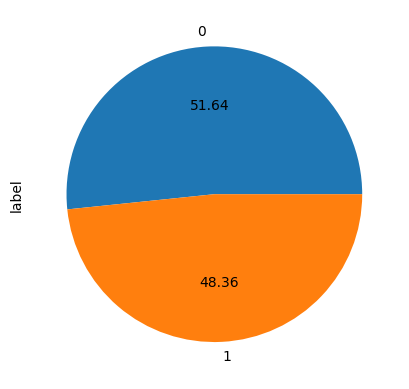

In [11]:
dt["label"].value_counts().plot(kind="pie", autopct='%.2f')

In [12]:
features = dt["text"].values
labels = dt["label"].values
print(f"Feature: {features[2]}, Label: {labels[0]}")

Feature: Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you've got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and who failed grade school composition do? "I'll show those old meanies, I'll put out my own movie and prove that you don't have to know nuttin about your topic to still make money!" Yeah, we already know that. The one thing watching this film did for me was to give me a little insight into underclass thinking. The next time I see a slut in a bar who looks like Diane Lane, I'm running the other way. It's child abuse to let parents that worthless raise kids. It's audience abuse to simply stick Woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969., Label:

In [13]:
def clean_features(features):
    clean_features = []
    for sentence in range(0, len(features)):
        processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        processed_feature = re.sub(r'^b\s+', '', processed_feature)

        processed_feature = processed_feature.lower()

        clean_features.append(processed_feature)
    return clean_features

features = clean_features(features)
print(features[:2])

['i grew up 1965 watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form took my children to see the movie hoping they would get glimpse of what loved as child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless waste of film utter rubbish cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was huge error of judgment ', 'when put this movie in my dvd player and sat down with coke and some chips had some expectations was hoping that this movie would contain some of the strong p

In [14]:
print(features[1])

when put this movie in my dvd player and sat down with coke and some chips had some expectations was hoping that this movie would contain some of the strong points of the first movie awsome animation good flowing story excellent voice cast funny comedy and kick ass soundtrack but to my disappointment not any of this is to be found in atlantis milo return had read some reviews first might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentioned br br when the first scene appears your in for shock if you just picked atlantis milo return from the display case at your local videoshop or whatever and had the expectations had the music feels as bad imitation of the first movie and the voice cast has been replaced by not so fitting one with the exception of few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is sad sight the storyline is a

In [24]:
!pip install nltk


In [27]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_texts = []
for text in features:
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_texts.append(" ".join(filtered_words))

print(filtered_texts[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


grew 1965 watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott one wanted alan counting 5 became art form took children see movie hoping would get glimpse loved child bitterly disappointing high point snappy theme tune could compare original score thunderbirds thankfully early saturday mornings one television channel still plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment


In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


4000 4000
1000 1000


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 0 ... 0 0 0]] 35035


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.839


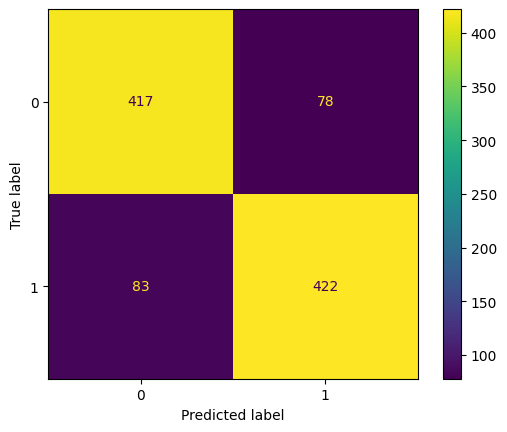

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

In [19]:
# instantiate the vectorizer
vect = CountVectorizer(max_features=5000)
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 1 ... 0 0 0]] 5000


Accuracy:0.831


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


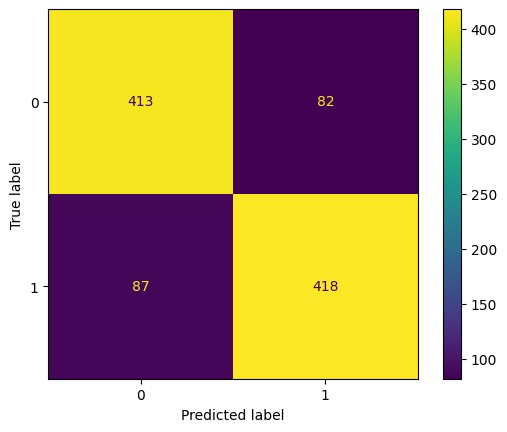

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)


Accuracy:0.814


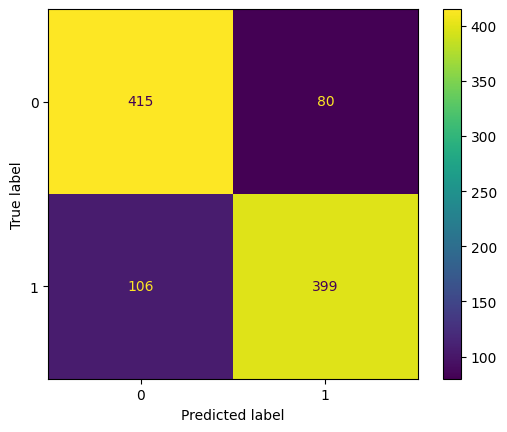

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

Accuracy: 0.814


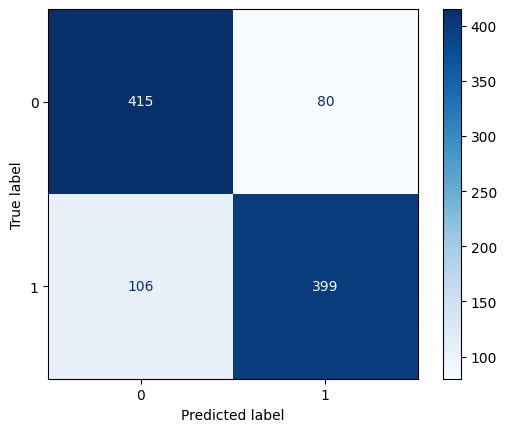

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tạo mô hình RandomForestClassifier và huấn luyện nó
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train_dtm, y_train)

# Dự đoán đầu ra cho dữ liệu kiểm thử
pred = model.predict(x_test_dtm)

# In ra độ chính xác
print(f"Accuracy: {accuracy_score(y_test, pred)}")

# Tính và vẽ confusion matrix với màu sắc dễ nhìn
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)  # Chọn màu từ đỏ đến xanh (Blues)

# Hiển thị confusion matrix
plt.show()

In [23]:
# Đưa ra thông tin báo cáo về kết quả phân loại
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       495
           1       0.83      0.79      0.81       505

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

